In [1]:
import time
start_time=time.time()

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lmfit

from bfunc import bfunc00,bfunc01,bfunc02

Data load and region parameters

In [3]:
data = json.load(open("SFdata//OrionSmall.json"))

pixscale = 0.534 # arcsec
pixscale *= 0.00242               # parsec
s0 = 0.00242/2.355              # parsec
m = 1.5

In [4]:
r = pixscale * 10**np.array(data["log10 r"])
rgrid = pixscale * np.logspace(0.0, 2.5)

B = np.array(data["Unweighted B(r)"])

sig2 = data["Unweighted sigma^2"]
#r0 = np.interp(sig2, B, r)
r0=0.06

In [5]:
B=B[9:55]
r=r[9:55]

(9.375506960018136, 0.06)

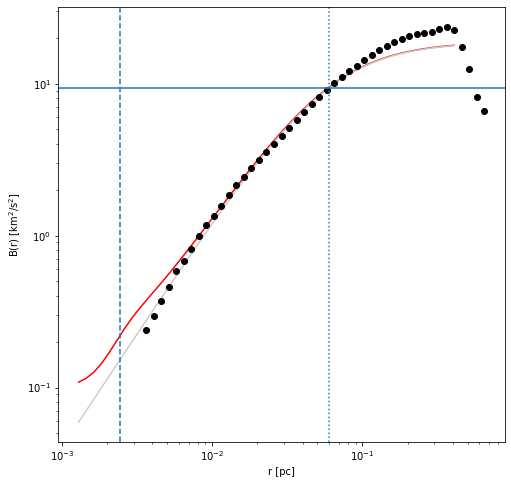

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
# Plot fit to unweighted strucfunc
ax.plot(rgrid, bfunc02(rgrid, r0, sig2, m, s0, 1/10), color="red")
ax.plot(rgrid, bfunc00(rgrid, r0, sig2, m), color="0.8")
# Plot points from unweighted strucfunc
ax.plot(r, B, 'o',  color='black')

ax.axhline(sig2)
ax.axvline( 2.355  * s0, linestyle="dashed")
ax.axvline(r0, linestyle="dotted")

ax.set(
    xscale = "log",
    yscale = "log",
#    ylim  = [1, 250],
#    xlim  = [1, 150],
    xlabel = "r [pc]",
    ylabel = r"B(r) [km$^{2}$/s$^{2}$]",
)

sig2,r0

In [7]:
model02 = lmfit.Model(bfunc02)
model02.param_names

['r0', 'sig2', 'm', 's0', 'noise']

In [8]:
relative_uncertainty = 0.15
weights = 1.0 / (relative_uncertainty * B)
weights[r > r0] /= 3

In [9]:
for p in model02.param_names:
    model02.set_param_hint(p, min=0.0)
model02.set_param_hint("sig2", value=sig2, vary=False)
model02.print_param_hints()

Name      Value      Min      Max     Vary    Expr    
m           nan        0      inf     True    
noise       nan        0      inf     True    
r0          nan        0      inf     True    
s0          nan        0      inf     True    
sig2    9.37551        0      inf    False    


In [10]:
result2 = model02.fit(
    B, 
    weights=weights,
    r=r, r0=r0, m=m, s0=s0, noise=1/10,
)

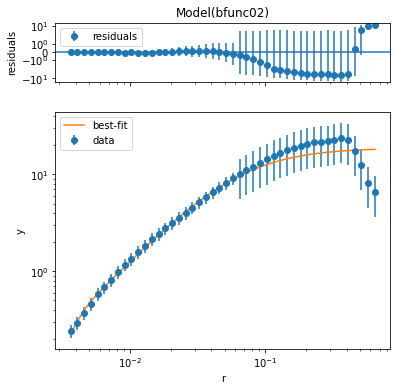

In [11]:
fig, _ = result2.plot()
fig.axes[0].set(
    xscale="log",
    yscale="symlog",
)
fig.axes[1].set(
    xscale="log",
    yscale="log",
);



In [12]:
print(result2.fit_report())

[[Model]]
    Model(bfunc02)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 63
    # data points      = 46
    # variables        = 4
    chi-square         = 27.2846739
    reduced chi-square = 0.64963509
    Akaike info crit   = -16.0265474
    Bayesian info crit = -8.71198186
[[Variables]]
    r0:     0.06210825 +/- 0.00321688 (5.18%) (init = 0.06)
    sig2:   9.375507 (fixed)
    m:      1.44229862 +/- 0.07080551 (4.91%) (init = 1.5)
    s0:     0.00162457 +/- 2.8187e-04 (17.35%) (init = 0.001027601)
    noise:  1.5045e-08 +/- 0.08736192 (580656703.26%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(s0, noise) =  0.879
    C(m, noise)  =  0.771
    C(r0, m)     = -0.722
    C(m, s0)     =  0.494
    C(r0, noise) = -0.206


In [13]:
#for p in result2.model.param_names:
#    result2.params[p].stderr = result2.params[p].value * 0.1

In [14]:
result2.conf_interval()
print(result2.ci_report())

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=-0.510862641568731 < 1e-05 at iteration 2 and prob(s0=0.002188308857470646) = 0.24650780781608547 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:312: UserWarning: Bound reached with prob(noise=0.0) = 0.0 < max(sigmas)
  warn(errmsg)


          99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 r0   :  -0.00365  -0.00242  -0.00121   0.06211  +0.00350  +0.00769  +0.01608
 m    :  -0.04627  -0.03043  -0.01517   1.44230  +0.11457  +0.18177  +0.25694
 s0   :  -0.00064  -0.00025  -0.00011   0.00162      +inf      +inf      +inf
 noise:      -inf      -inf      -inf   0.00000      +inf      +inf      +inf


C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=-8.322328184562964e-05 < 1e-05 at iteration 69 and prob(noise=0.06900001504536522) = 0.505284343695998 < max(sigmas).
  warn(errmsg)


In [15]:
plt.style.use([
    "seaborn-poster",
])

In [23]:
plot_limits = {
    "s0": [0.0001, 0.006],
    "m": [1.1, 1.8],
    "r0": [0.04, 0.1],
    "noise": [0.0, 0.5],
}

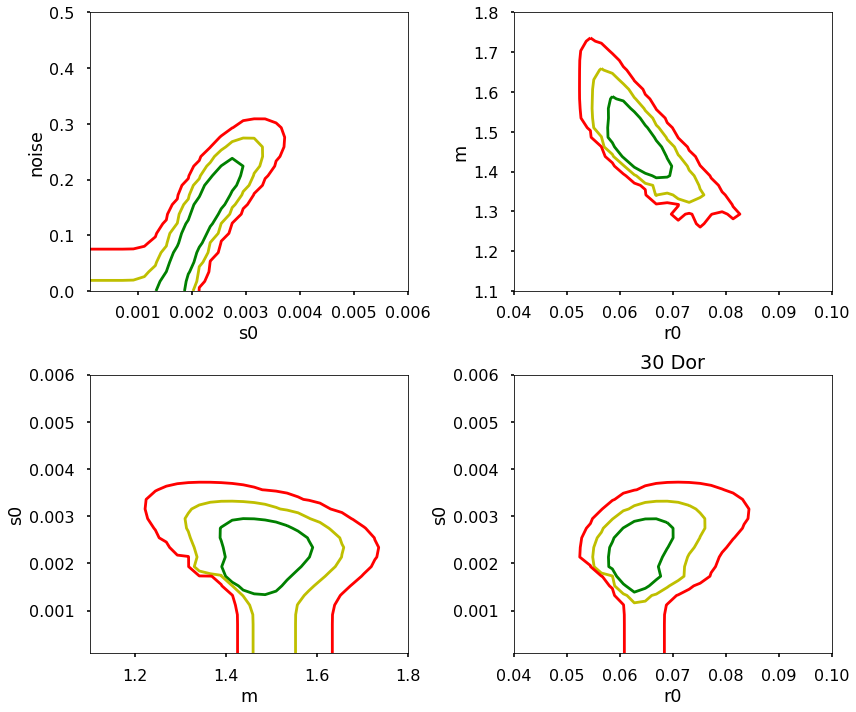

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plt.title('30 Dor')
levels = [0.6827, 0.9545, 0.9973]
colors = ["g", "y", "r"]

for ax, [xvar, yvar] in zip(axes.flat, [
    ["s0", "noise"],
    ["r0", "m"],
    ["m", "s0"],
    ["r0", "s0"],
]):
    cx, cy, grid = lmfit.conf_interval2d(
        result2, result2, xvar, yvar, 30, 30,
        limits=[plot_limits[xvar], plot_limits[yvar]],
    )
    ctp = ax.contour(cx, cy, grid, levels, colors=colors)
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)

fig.tight_layout();

In [18]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 21.972929000854492 seconds ---
